# Exploratory Data Analysis and Visualization

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [227]:
# Basic Libraries
import json
import statistics
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# !pip install ipynb

---

## 1. Exploring `anime.csv` dataset [2000 to 2021 animes]




In [3]:
anime_df = pd.read_csv('dataset/anime_cleaned.csv')
anime_df.head()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,...,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,...,1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,...,1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,...,1979.0,spring,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,...,1999.0,fall,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,...,2000.0,winter,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0


### Features available to explore:

In [4]:
print("Features:")
print("---------")

for header in anime_df.columns:
    print(header)

Features:
---------
id
title
start_date
end_date
synopsis
mean
rank
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
average_episode_duration
rating
studios
start_season_year
start_season_season
broadcast_day_of_the_week
broadcast_start_time
statistics_watching
statistics_completed
statistics_on_hold
statistics_dropped
statistics_plan_to_watch
statistics_num_list_users


### Convert `studios` and `genres` features to json for exploration:

In [6]:
from ipynb.fs.full.data_cleaning_preprocessing import json_studios, json_genres;
print("json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb")

json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb


In [7]:
# convert to json
anime_df = json_studios(anime_df)
anime_df = json_genres(anime_df)

## 1. Explore `genres` feature

In [8]:
from collections import defaultdict

In [100]:
genres_dict = defaultdict(int)

# getting the genres count from 2000 to 2021
for anime in anime_df['genres']:
    for genre in anime:
        genres_dict[genre['name']] += 1
               
# printing out the genre counts
for genre, count in genres_dict.items():
    print(f'{genre}: {count}')

Action: 2744
Adventure: 2278
Drama: 1620
Mecha: 623
Military: 381
Romance: 1125
Sci-Fi: 1458
Space: 230
Comedy: 4571
Fantasy: 2311
Kids: 1253
Shounen: 2036
Super Power: 606
Police: 236
Slice of Life: 1377
School: 1197
Shoujo: 637
Ecchi: 334
Seinen: 626
Mystery: 642
Demons: 351
Horror: 191
Supernatural: 1075
Psychological: 255
Parody: 339
Cars: 69
Historical: 583
Martial Arts: 295
Samurai: 128
Avant Garde: 74
Vampire: 93
Suspense: 118
Music: 821
Game: 377
Harem: 157
Gourmet: 100
Sports: 465
Boys Love: 41
Girls Love: 39
Award Winning: 3
no_genre: 8
Josei: 70


### 1.1 Plot genre counts

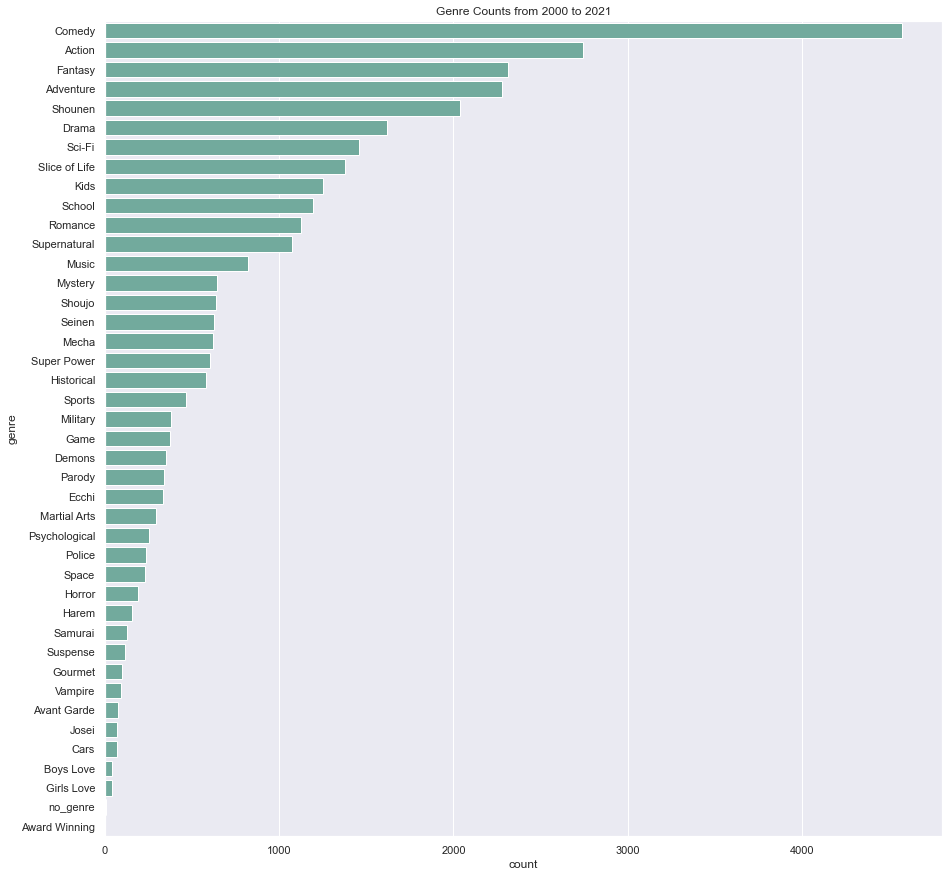

In [10]:
# Plot Genre Counts

# convert dict to dataframe
genre_df = pd.DataFrame(genres_dict.items())

# rename column names
genre_df.rename(columns={0: 'genre', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
genre_df = genre_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 15))

# Make a barplot
sb.barplot(
    x="count", 
    y="genre", 
    data=genre_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Genre Counts from 2000 to 2021");

- It can be seen that `Comedy` is the genres that most anime have
- The top 5 genres commonly seen  are `Comedy`,  `Action`, `Fantasy`, `Adventure`, and `Shounen`

**Analysis:**
- It seems that animes are generally produced to produce some sort of commedic effect, with a sense of fantasy and adventure filled with action packed scenes.
- Thus, it appears that animes are shows that allow people to have a fun time escaping into another world

---

## 1.2 Let's explore those with no genres:

In [105]:
no_genre_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    if anime_df['genres'][row][0]['name'] == 'no_genre':
        no_genre_df = no_genre_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with no genres:', len(no_genres_df))

no_genre_df

-> Number of animes with no genres: 8


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,22239,Mahou no Yousei Persia Pilot,2003-05-23,2003-05-23,Unaired pilot special of Mahou no Yousei Persi...,5.59,10328,13823,417,120,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,184,pg,"[{'id': 1, 'name': 'Studio Pierrot'}]",2003.0,spring,NIL,NIL,14.0,196.0,9.0,40.0,157.0,416.0
1,6199,Mai-Otome Zwei Special,2008-03-04,2008-03-04,Ribbon-chan wants to become an Otome.\n\n(Sour...,6.64,5472,8329,3369,1297,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,271,g,"[{'id': 14, 'name': 'Sunrise'}]",2008.0,winter,NIL,NIL,68.0,2075.0,59.0,57.0,1107.0,3366.0
2,3805,Kaitou Tenshi Twin Angel,2008-08-08,2008-10-02,Haruka Minazuki and Aoi Kannazuki are freshman...,6.02,8649,6888,5649,1881,white,ova,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",2,game,1800,pg_13,"[{'id': 70, 'name': 'Nomad'}]",2008.0,summer,NIL,NIL,225.0,2492.0,138.0,163.0,2630.0,5648.0
3,6368,Legend of Regios,2009-03-27,2009-05-29,Legend of Regios was originally the English sp...,6.42,6641,5497,9856,2585,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",3,unknown,506,r,"[{'id': 218, 'name': 'Zexcs'}]",2009.0,winter,NIL,NIL,342.0,4056.0,199.0,193.0,5068.0,9858.0
4,32644,Yaseruyagi,2010-03-28,2010-03-28,"A story about granny, her granddaughter and a ...",5.3,11193,14629,332,159,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,37,g,[],2010.0,winter,NIL,NIL,9.0,227.0,0.0,34.0,62.0,332.0
5,10710,Houkago no Pleiades: Manner Movie,2011-06-04,2011-06-04,A manner movie based on the Houkago no Pleiade...,5.35,11046,9257,2349,698,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,90,pg_13,"[{'id': 6, 'name': 'Gainax'}]",2011.0,spring,NIL,NIL,53.0,1077.0,40.0,63.0,1118.0,2351.0
6,32695,Match Shoujo,2016-02-10,2016-02-10,An animated commercial produced by studio NAZ ...,5.73,9833,11695,899,309,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,manga,71,pg,"[{'id': 951, 'name': 'NAZ'}]",2016.0,winter,NIL,NIL,46.0,509.0,9.0,30.0,312.0,906.0
7,38341,Bai Niao,2017-06-13,2017-06-13,"After her mother's death, young kazakh girl Ah...",5.88,9244,13388,484,155,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,unknown,839,g,[],2017.0,spring,NIL,NIL,18.0,208.0,8.0,28.0,226.0,488.0


In [106]:
# average number of episodes
print('Average number of episodes for animes:', round(anime_df['num_episodes'].mean(), 1))
print('----- \n')

print('Animes with no genres: \n')
# number of episodes for animes with no genres
for anime in range(0, len(no_genre_df)):
    print(f'{no_genre_df["title"][anime]} has {no_genre_df["num_episodes"][anime]} episodes!')
print("")

# average number of episodes for animes with no genres
print('Average number of episodes: ', round(no_genre_df['num_episodes'].mean(), 1))

Average number of episodes for animes: 45.1
----- 

Animes with no genres: 

Mahou no Yousei Persia Pilot has 1 episodes!
Mai-Otome Zwei Special has 1 episodes!
Kaitou Tenshi Twin Angel has 2 episodes!
Legend of Regios has 3 episodes!
Yaseruyagi has 1 episodes!
Houkago no Pleiades: Manner Movie has 1 episodes!
Match Shoujo has 1 episodes!
Bai Niao has 1 episodes!

Average number of episodes:  1.4


In [107]:
print(no_genre_df['broadcast_day_of_the_week'])
print(no_genre_df['broadcast_start_time'])

0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_day_of_the_week, dtype: object
0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_start_time, dtype: object


**Analysis:**
- It appears that animes with no genres have very low episode count, and are not broadcasted
- This might imply that people rating animes did not have sufficient information to make a proper judgement on the genre of these animes
- These can be considered an `anomaly` since only 8 animes from 2000-2021 do not have any genres

---

## 1.3 Let's explore those with `Award Winning` genre:

In [103]:
award_winning_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    for genre in anime_df['genres'][row]:
        if genre['name'] == 'Award Winning':
            award_winning_df = award_winning_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with "Award Winning" genre:', len(award_winning_df))

award_winning_df

-> Number of animes with "Award Winning" genre: 3


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,199,Sen to Chihiro no Kamikakushi,2001-07-20,2001-07-20,"Stubborn, spoiled, and naïve, 10-year-old Chih...",8.79,32,43,1566400,1096313,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 46, 'n...",1,original,7475,pg,"[{'id': 21, 'name': 'Studio Ghibli'}]",2001.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,1773.0,128401.0,1570198.0
1,5365,Tsumiki no Ie,2008-06-10,2008-06-10,In a flooded town where the waters are ever-ri...,8.04,502,1855,87239,49407,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 8...",1,original,723,g,"[{'id': 234, 'name': 'Oh! Production'}]",2008.0,spring,NIL,NIL,1127.0,61611.0,457.0,288.0,23844.0,87327.0
2,50206,Takano Kousaten,2021-09-17,2021-09-17,"In a certain city, for just a moment in time, ...",6.85,4463,12447,686,369,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 3...",1,original,390,pg_13,[],2021.0,summer,NIL,NIL,31.0,506.0,2.0,10.0,161.0,710.0


In [104]:
award_winning_df.describe()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
count,3,3,3,3,3,3.00,3,3,3,3,3,3,3,3,3,3,3,3,3,3.0,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0
unique,3,3,3,3,3,3.00,3,3,3,3,1,1,1,3,1,1,3,3,3,3.0,2,1,1,3.0,3.0,3.0,3.0,3.0,3.0
top,5365,Takano Kousaten,2021-09-17,2021-09-17,In a flooded town where the waters are ever-ri...,8.79,32,1855,1566400,1096313,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 8...",1,original,723,pg,"[{'id': 234, 'name': 'Oh! Production'}]",2008.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,288.0,23844.0,710.0
freq,1,1,1,1,1,1.00,1,1,1,1,3,3,3,1,3,3,1,1,1,1.0,2,3,3,1.0,1.0,1.0,1.0,1.0,1.0


**Analysis:**
- From this one, can see that all 3 of the `Award Winning` genre animes have the same `nsfw`, `media_type`, `num_episodes`, `source`, `broadcast_day_of_the_week` and `broadcast_start_time` as seen from the unique count from .describe()
- All 3 are movies with 1 episode, have original source, not broadcasted on TV and has white nsfw

---

## 1.4 Compare `Award Winning` with `no_genre`:


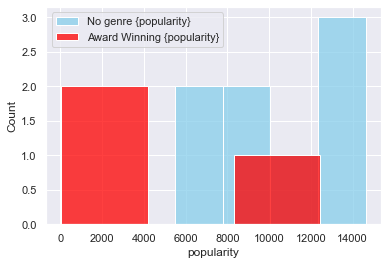

In [113]:
# compare popularity

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="popularity", color="skyblue", label="No genre {popularity}", kde=False)
sb.histplot(data=award_winning_df, x="popularity", color="red", label="Award Winning {popularity}", kde=False)

plt.legend() 
plt.show()

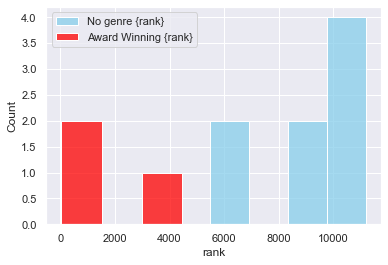

In [114]:
# compare rank

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="rank", color="skyblue", label="No genre {rank}", kde=False)
sb.histplot(data=award_winning_df, x="rank", color="red", label="Award Winning {rank}", kde=False)

plt.legend() 
plt.show()

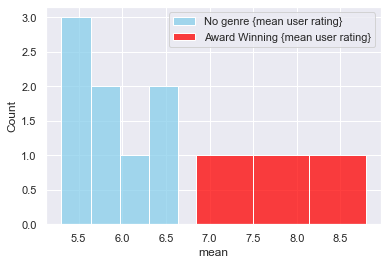

In [116]:
# compare mean user rating: {mean}

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="mean", color="skyblue", label="No genre {mean user rating}", kde=False)
sb.histplot(data=award_winning_df, x="mean", color="red", label="Award Winning {mean user rating}", kde=False)

plt.legend() 
plt.show()

**Analysis:**
- `Award Winning` animes on generally have higher popularity, have better rankings, and are rated higher for all the animes than that of `no_genre` animes
- It seems like what differentiate these 2 categories is that `Award Winning` animes are more popular and higher ranked such that `Award Winning` animes have genres associated with them whereas `no_genre` animes do not.

**Next Step:**
- Let's look at the various `statistics` to compare the viewership statistics:
  - statistics_watching
  - statistics_completed
  - statistics_on_hold
  - statistics_dropped
  - statistics_plan_to_watch
  - **statistics_num_list_users** (equal to sum of the previous statistics)
  
- We shall split the statistics into 2 groups to group the **positive/negative sentiment of the viewership statistics**:
  1. `Positive`
    - statistics_watching + statistics_completed + statistics_plan_to_watch
  2. `Negative`
    - statistics_on_hold + statistics_dropped

In [198]:
# compare statistics_num_list_users
no_genre_total_views = no_genre_df['statistics_num_list_users'].mean()
award_winning_total_views = award_winning_df['statistics_num_list_users'].mean()

print('[Comparing statistics_num_list_users (Average number of viewers)]')
print('-----')
print("'no_genre':      \t", no_genre_total_views)
print("'Award Winning': \t", award_winning_total_views)

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_total_views/no_genre_total_views)*100, 2)}% more views than 'no_genre'")

[Comparing statistics_num_list_users (Average number of viewers)]
-----
'no_genre':      	 2920.625
'Award Winning': 	 552745.0
-----
Percentage greater (using mean values):
'Award Winning' has 18925.57% more views than 'no_genre'


In [178]:
positive_viewership = [
    'statistics_watching',
    'statistics_completed',
    'statistics_plan_to_watch'
]

negative_viewership = [
    'statistics_on_hold',
    'statistics_dropped'
]

# sum row then take mean for all animes
def get_pos_neg_views(df, viewership_types_list):
    total_views = []
    for anime in range(0, len(df)):
        single_view = 0

        for viewership_type in viewership_types_list:
            single_view += df[viewership_type][anime]

        # add this anime single_positive_view to list
        total_views.append(single_view)
        
    return total_views

In [199]:
# compare positive viewership statistics
no_genre_pos_views = round(statistics.mean(get_pos_neg_views(no_genre_df, positive_viewership)), 2)
award_winning_pos_views = round(statistics.mean(get_pos_neg_views(award_winning_df, positive_viewership)), 2)

print('[Comparing positive viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_pos_views)
print("'Award Winning': \t", award_winning_pos_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_pos_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_pos_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_pos_views/no_genre_pos_views)*100, 2)}% more positive views than 'no_genre'")

[Comparing positive viewership statistics]
-----
Mean:
'no_genre':      	 2786.88
'Award Winning': 	 550592.33
-----
Percentage of total views (using mean values):
'no_genre':      	 95.42%
'Award Winning': 	 99.61%
-----
Percentage greater (using mean values):
'Award Winning' has 19756.59% more positive views than 'no_genre'


In [200]:
# compare negative viewership statistics
no_genre_neg_views = round(statistics.mean(get_pos_neg_views(no_genre_df, negative_viewership)), 2)
award_winning_neg_views = round(statistics.mean(get_pos_neg_views(award_winning_df, negative_viewership)), 2)

print('[Comparing negative viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_neg_views)
print("'Award Winning': \t", award_winning_neg_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_neg_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_neg_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_neg_views/no_genre_neg_views)*100, 2)}% more negative views than 'no_genre'")

[Comparing negative viewership statistics]
-----
Mean:
'no_genre':      	 133.75
'Award Winning': 	 2152.67
-----
Percentage of total views (using mean values):
'no_genre':      	 4.58%
'Award Winning': 	 0.39%
-----
Percentage greater (using mean values):
'Award Winning' has 1609.47% more negative views than 'no_genre'


**Analysis:**
- It appears that `Award Winning` animes have more views than `no_genre` by a large amount on average
  - **18925.57% more**
- Additionally, the percentage of positive views is greater for `Award Winning` animes than that of `no_genre` animes
  - **0.39% vs 4.58%**
- Furthermore, the percentage of negative views is lower for `Award Winning` animes than that of `no_genre` animes
  - **99.61% vs 95.42%**
  
- Therefore, more people watch `Award Winning` animes and have positive experience with them compared to `no_genre` animes since the retention is greater for `Award Winning` animes.
- Thus, we can conclude that `Award Winning` animes are definitely more popular and viewed more. Hence, these animes have their associated genres

**Conclusion:**
- **Similarities**: number of episodes, broadcast details, status, and nsfw type
- We can conclude that the **differences** between `Award Winning` animes and `no_genre` animes include the popularity, rank, user ratings, and the viewership statistics. (Even though both type have similar number of episodes, broadcast details, status, and nsfw type

---

## 1.5 Exploring `genres` trend from 2000 to 2021
- We will use `start_season_year` and `genres`

In [255]:
anime_time_series_df = anime_df.loc[:, ['start_season_year', 'genres']]
anime_time_series_df.head()

,start_season_year,genres
0,1999.0,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'..."
1,1999.0,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'..."
2,1979.0,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na..."
3,1999.0,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'..."
4,2000.0,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na..."


In [352]:
# drop anime with no genres
anime_time_series_df = anime_df.loc[:, ['start_season_year', 'genres']]

print('Number of rows before:', len(anime_time_series_df))

for row in range(len(anime_time_series_df)):
    if anime_time_series_df['genres'][row][0]['name'] == 'no_genre':
        anime_time_series_df.drop(index=row, inplace=True)

# reset the index
anime_time_series_df = anime_time_series_df.reset_index(drop=True)

print('Number of rows left:', len(anime_time_series_df))

Number of rows before: 8777
Number of rows left: 8769


In [353]:
# for each anime, split the genres into individual genre, 
# and add as new row with associated start_season_year, 

index_count = 8769

for row in range(len(anime_time_series_df)):
    start_season_year = anime_time_series_df['start_season_year'][row]
    
    for genre in anime_time_series_df['genres'][row]:
        anime_time_series_df = anime_time_series_df.append(
            pd.DataFrame({"start_season_year": start_season_year, "genres": genre})
            .drop(index=['id'])
            .rename(index={'name': index_count}))
        index_count += 1


# drop previous rows
anime_time_series_df = anime_time_series_df[8769:]
anime_time_series_df = anime_time_series_df.reset_index(drop=True)
anime_time_series_df

,start_season_year,genres
0,1999.0,Action
1,1999.0,Adventure
2,1999.0,Drama
3,1999.0,Mecha
4,1999.0,Military
...,...,...
31924,2021.0,Music
31925,2021.0,Supernatural
31926,2021.0,Vampire
31927,2010.0,Comedy


In [357]:
# rename 'genres' as 'genre'
anime_time_series_df.rename({'genres': 'genre'}, axis="columns", inplace=True)

# group according to start_season_year and genres


,start_season_year,genre
0,1999.0,Action
1,1999.0,Adventure
2,1999.0,Drama
3,1999.0,Mecha
4,1999.0,Military
...,...,...
31924,2021.0,Music
31925,2021.0,Supernatural
31926,2021.0,Vampire
31927,2010.0,Comedy
